In [1]:
#Lets import necessary libraries
import numpy as np
import pandas as pd


#For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
#Lets use Dataset from sklearn
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()
x=dataset.data
y=dataset.target

In [25]:
#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=94062)

In [11]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=====================Training Score================")
        print("Accuracy Score==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=cnn.predict(x_test)
        print("===================Testing Score====================")
        print("Accuracy Score ==> ",accuracy_score(y_test,pred)*100)
        print("Classification Score==> ",classification_report(y_test,pred))

In [12]:
#Lets Create Model

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [23]:
cnn=KNeighborsClassifier()
cnn.fit(x_train,y_train)
cnn.score(x_test,y_test)
print("Model is Trained")

Model is Trained


In [27]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=====================Training Score================
Accuracy Score==>  0.9507042253521126
===================Testing Score====================
Accuracy Score ==>  93.7062937062937
Classification Score==>                precision    recall  f1-score   support

           0       0.98      0.86      0.92        58
           1       0.91      0.99      0.95        85

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [15]:
#Lets Compare with Bagging Classifier

In [52]:
cnn=BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=2,max_samples=.4,bootstrap=True,oob_score=True,random_state=94062)

In [53]:
cnn.fit(x_train,y_train)

C:\Users\shriv\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:706: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\shriv\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:712: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.4,
                  n_estimators=2, oob_score=True, random_state=94062)

In [54]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=====================Training Score================
Accuracy Score==>  0.9342723004694836
===================Testing Score====================
Accuracy Score ==>  94.4055944055944
Classification Score==>                precision    recall  f1-score   support

           0       0.98      0.88      0.93        58
           1       0.92      0.99      0.95        85

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.95      0.94      0.94       143



#  Random Forest 

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [63]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/cardio_train.csv',sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [66]:
data.shape

(69301, 13)

In [67]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
#There is no null values but theres is outliers.
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [70]:
#Lets Plot Graph in using Distribution Plot But only selection parts because we have less time

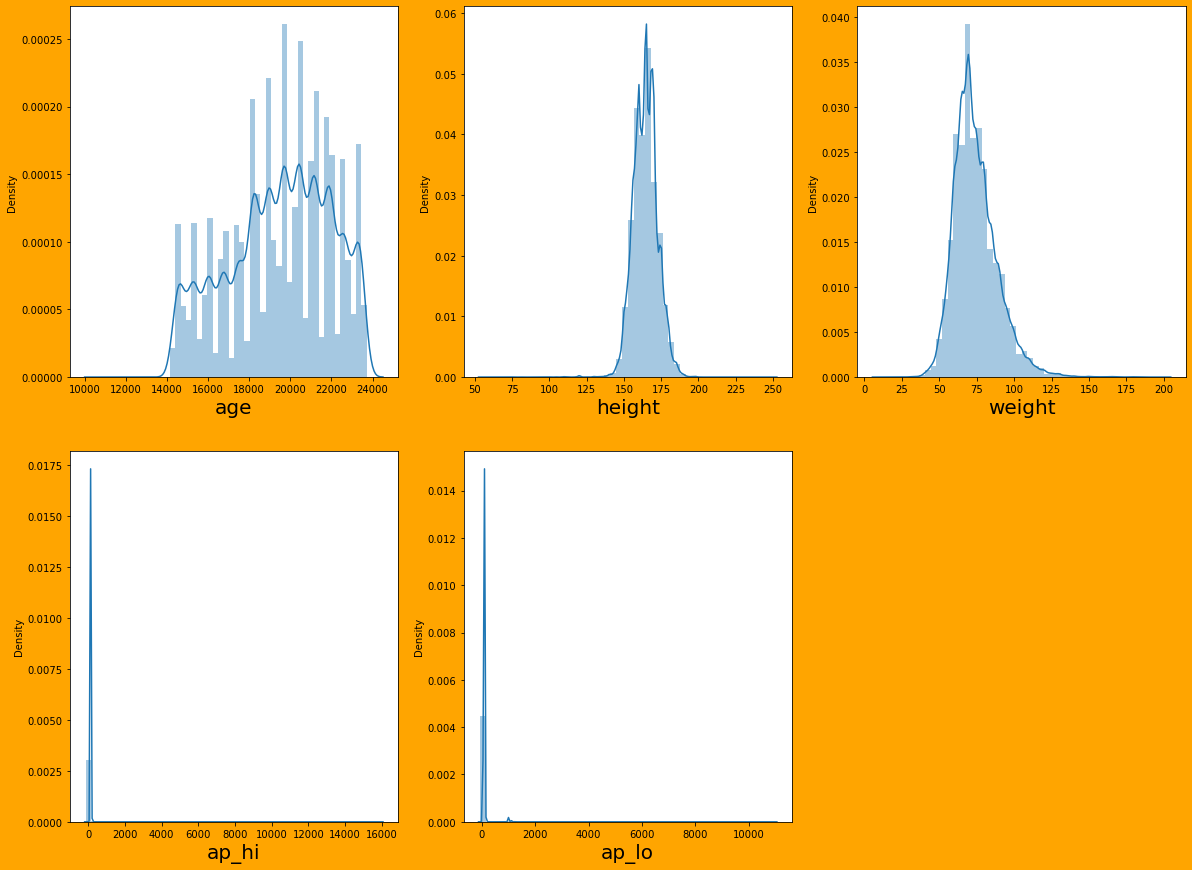

In [73]:
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber=1
for column in data[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()
        

In [72]:
import warnings
warnings.filterwarnings('ignore')

In [74]:
#Remove outliers by using z score

In [75]:
from scipy.stats import zscore

In [80]:
z_score=zscore(data[['age','height','weight','ap_hi','ap_lo']])
abs_score=np.abs(z_score)
filtering_entry=(abs_score <3.3).all(axis=1)
data=data[filtering_entry]
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000,65971.000000
mean,50494.336345,19456.977111,1.346107,164.376347,73.400977,125.738446,80.963848,1.357657,1.220885,0.086750,0.052644,0.804323,0.487229
std,28565.243572,2468.137509,0.475731,7.669369,13.044288,15.169329,8.874290,0.674174,0.566875,0.281471,0.223324,0.396724,0.499841
min,988.000000,14275.000000,1.000000,140.000000,32.000000,80.000000,52.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25743.500000,17648.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50541.000000,19697.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75158.500000,21318.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,188.000000,115.000000,178.000000,110.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


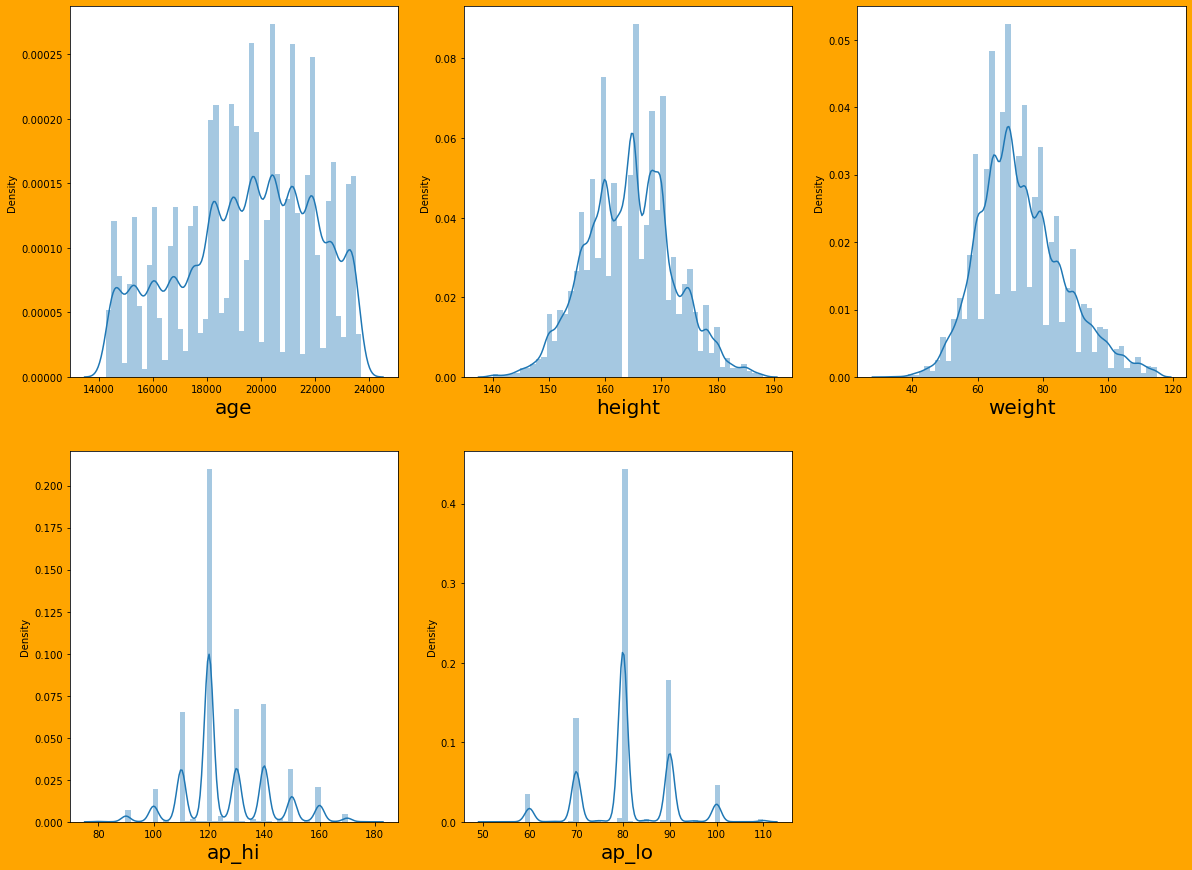

In [81]:
plt.figure(figsize=(20,15),facecolor='orange')
plotnumber=1
for column in data[['age','height','weight','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()
        

In [83]:
#Now our data  prerposseing is completed.

In [158]:
x=data.drop(columns=['cardio'])
y=data.cardio


In [157]:
del data['id']

In [159]:
x.shape

(65971, 11)

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [161]:
#lest check multicollinearty problem by vif.

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['columns']=x.columns
vif

,vif,columns
0,1.076368,age
1,1.502598,gender
2,1.514971,height
3,1.224221,weight
4,2.194230,ap_hi
5,2.108438,ap_lo
6,1.318612,cholesterol
7,1.257017,gluc
8,1.247403,smoke
9,1.139228,alco


In [164]:
#I think all colums is right for data prediction   by random forest

In [165]:
#So lets import Random Forest Classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
cnn=RandomForestClassifier()

In [168]:
cnn.fit(x_train,y_train)

RandomForestClassifier()

In [169]:
data.tail(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69299,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [170]:
cnn.predict(scaler.transform([[20540,1,170,72.0,120,80,2,1,0,0,1]]))

ValueError: X has 11 features, but RandomForestClassifier is expecting 30 features as input.

In [113]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=====================Training Score================
Accuracy Score==>  1.0
===================Testing Score====================
Accuracy Score ==>  95.1048951048951
Classification Score==>                precision    recall  f1-score   support

           0       0.96      0.91      0.94        58
           1       0.94      0.98      0.96        85

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [114]:
#Model is Overfitted

In [115]:
#Hyperparameter Tuning.

In [117]:
from sklearn.model_selection import GridSearchCV

In [123]:
best_param={'n_estimators':[13,14],
           'criterion':['entropy','gini'],
           'min_samples_split':[12,14],
           'min_samples_leaf':[14,16],
            'max_depth':[12,4]}

In [125]:
grid_search=GridSearchCV(estimator=cnn,param_grid=best_param,cv=2)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 16,
 'min_samples_split': 12,
 'n_estimators': 13}

In [133]:
cnn=grid_search.best_estimator_

In [134]:
cnn.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=16,
                       min_samples_split=12, n_estimators=13)

In [135]:
cnn.score(x_train,y_train)

0.9553990610328639

In [136]:
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=====================Training Score================
Accuracy Score==>  0.9553990610328639
===================Testing Score====================
Accuracy Score ==>  93.7062937062937
Classification Score==>                precision    recall  f1-score   support

           0       0.92      0.93      0.92        58
           1       0.95      0.94      0.95        85

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143



In [137]:
#Lets Plot ROC AND AUC SCORE

In [138]:
from sklearn.metrics import roc_auc_score,roc_curve

In [141]:
from sklearn.metrics import plot_roc_curve

In [142]:
#Lets import all algorithm and plot in 1 graph all algorithm result

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [144]:
rf=RandomForestClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [145]:
rf.fit(x_train,y_train)
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
print("All model is fitted")

All model is fitted


In [147]:
rf.score(x_test,y_test)
lr.score(x_test,y_test)
dt.score(x_test,y_test)
knn.score(x_test,y_test)
print("All Models Predicted")

All Models Predicted


In [148]:
#Lets Plot in one Graph

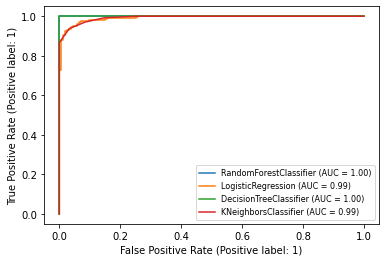

In [152]:
disp=plot_roc_curve(rf,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':8},loc='lower right')
plt.show()

In [153]:
#Lets check test score

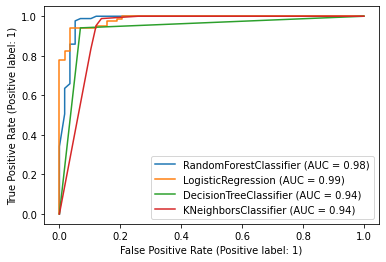

In [154]:
disp=plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()